https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [1]:
import pandas as pd
df = pd.read_csv('C:\Users\Darwoft\Desktop\Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,02/06/2019,Checking or savings account,Savings account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,CA,94583,NaN,NaN,Web,02/06/2019,In progress,Yes,NaN,3144264.0
1,02/06/2019,Vehicle loan or lease,Loan,Incorrect information on your report,Account status incorrect,NaN,NaN,ALLY FINANCIAL INC.,TX,NaN,NaN,NaN,Web,02/06/2019,In progress,Yes,NaN,3144580.0
2,02/06/2019,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"ONEMAIN FINANCIAL HOLDINGS, LLC.",MD,20770,NaN,NaN,Phone,02/06/2019,In progress,Yes,NaN,3144248.0
3,02/06/2019,"Payday loan, title loan, or personal loan",Payday loan,Charged fees or interest you didn't expect,NaN,NaN,NaN,Ad Astra Recovery Services Inc,CA,911XX,NaN,NaN,Web,02/06/2019,Closed with explanation,Yes,NaN,3143980.0
4,02/06/2019,Vehicle loan or lease,Loan,Getting a loan or lease,Confusing or misleading advertising or marketing,NaN,NaN,"ONEMAIN FINANCIAL HOLDINGS, LLC.",PA,152XX,NaN,NaN,Web,02/06/2019,In progress,Yes,NaN,3142808.0


In [2]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10126 entries, 464 to 40867
Data columns (total 18 columns):
Date received                   10126 non-null object
Product                         10126 non-null object
Sub-product                     10126 non-null object
Issue                           10126 non-null object
Sub-issue                       8880 non-null object
Consumer complaint narrative    10126 non-null object
Company public response         7641 non-null object
Company                         10125 non-null object
State                           10104 non-null object
ZIP code                        7889 non-null object
Tags                            1665 non-null object
Consumer consent provided?      10125 non-null object
Submitted via                   10125 non-null object
Date sent to company            10125 non-null object
Company response to consumer    10125 non-null object
Timely response?                10125 non-null object
Consumer disputed?           

In [4]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]

In [5]:
df.columns

Index([u'Product', u'Consumer complaint narrative'], dtype='object')

In [6]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [7]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [8]:
df.head()

,Product,Consumer_complaint_narrative,category_id
464,Debt collection,I paid the debt over the phone with my credit ...,0
564,Debt collection,I contacted LJ Ross Associates on XX/XX/18 at ...,0
711,Debt collection,Called family members claiming I used them as ...,0
723,Debt collection,"During my monthly review of my credit, I notic...",0
728,Checking or savings account,<<<<<<<<<<<<<NOTICE OF INTENT TO SUE>>>>>>>>>>...,1


In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

<Figure size 800x600 with 1 Axes>

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(10126L, 27372L)

In [11]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Checking or savings account':
  . Most correlated unigrams:
       . deposit
       . bonus
  . Most correlated bigrams:
       . 15000 00
       . checking account
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . citi
       . card
  . Most correlated bigrams:
       . balance transfer
       . credit card
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
       . experian
       . report
  . Most correlated bigrams:
       . report understanding
       . appear report
# 'Debt collection':
  . Most correlated unigrams:
       . collection
       . debt
  . Most correlated bigrams:
       . report breathe
       . slandering good
# 'Money transfer, virtual currency, or money service':
  . Most correlated unigrams:
       . paypal
       . tickets
  . Most correlated bigrams:
       . sent money
       . western union
# 'Mortgage':
  . Most correlated unigrams:
       . modification
       . mortgage

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [13]:
print(clf.predict(count_vect.transform(["My identity has been compromised and the aftermath of this has left me with unauthorized activity involving my credit report. I recently disputed the activity and the credit agencies investigation came back verified. My question now is verified by whom, and when and how. What was the Method Of Verification.  And in accordance with FCRA I'm requesting the details of the Method, or the following inquiries shall be removed immediately. The following inquiries are, 1 ) XXXX XXXX XXXX, ( XXXX ) ( XXXX ) 2 ) XXXX XXXX XXXX ( XXXX ) 3 ) XXXX XXXX ( XXXX ) 4 ) XXXX XXXX ( XXXX ) 5 ) XXXX XXXX XXXX ( XXXX ) 6 ) XXXX XXXX ( XXXX ) 7 ) XXXX XXXX ( XXXX ) 8 ) XXXX XXXX ( XXXX ) 9 ) XXXX ( XXXX ) 10 ) XXXX ( XXXX ) 11 ) XXXX ( XXXX )"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [14]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


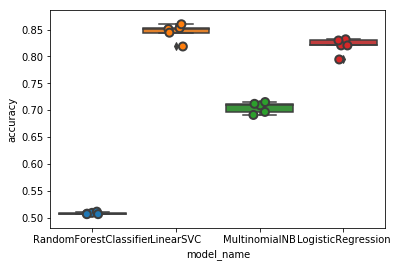

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [16]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.845363
LogisticRegression        0.819490
MultinomialNB             0.704917
RandomForestClassifier    0.508295
Name: accuracy, dtype: float64

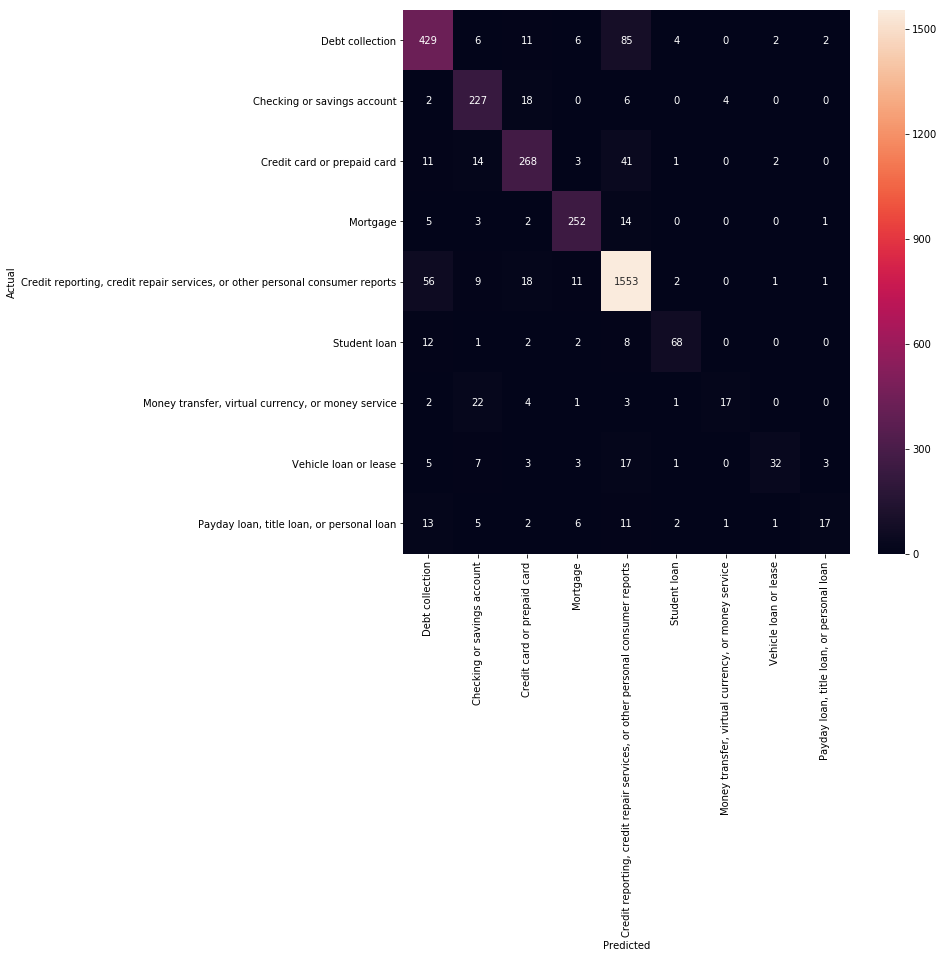

In [17]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [18]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Credit card or prepaid card' predicted as 'Debt collection' : 11 examples.


,Product,Consumer_complaint_narrative
20604,Credit card or prepaid card,I wanted to let you know that Citibank has bee...
31058,Credit card or prepaid card,i have been an american express customer for y...
16905,Credit card or prepaid card,I bought a Laptop from best buy for about {$14...
11030,Credit card or prepaid card,Consumer Financial Protection Bureau : My husb...
11805,Credit card or prepaid card,I made a payment on XX/XX/2018 of XXXX dollars...
36877,Credit card or prepaid card,Payment made XX/XX/XXXX was applied ~XXXX XXXX...
17576,Credit card or prepaid card,PayPal Credit charged my credit account {$69.0...
31528,Credit card or prepaid card,I contacted PENFED credit union by sending the...
32039,Credit card or prepaid card,A caller from XXXX routinely calls my cell pho...
40846,Credit card or prepaid card,"On 2 separate occasions during XX/XX/2018, age..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 56 examples.


,Product,Consumer_complaint_narrative
28580,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX. XXXX XXXX XXXX. This is n...
33667,"Credit reporting, credit repair services, or o...",The collection agency properly can not verify ...
31200,"Credit reporting, credit repair services, or o...",XXXX XXXX is reporting a debt on my credit fil...
24864,"Credit reporting, credit repair services, or o...",Transunion has taken the debt companies explan...
39680,"Credit reporting, credit repair services, or o...",I have a a unverified account from XXXX XXXX I...
2899,"Credit reporting, credit repair services, or o...",I recently filed a complaint against Bloomingd...
37424,"Credit reporting, credit repair services, or o...",Receivable Management Services International X...
27154,"Credit reporting, credit repair services, or o...",XXXX should not be reporting this! This is an...
33359,"Credit reporting, credit repair services, or o...",Please see Complaint # XXXX-XXXX On XX/XX/XXX...
36718,"Credit reporting, credit repair services, or o...",I attended XXXX XXXX XXXX where I was TOLD I q...



'Student loan' predicted as 'Debt collection' : 12 examples.


,Product,Consumer_complaint_narrative
31601,Student loan,XX/XX/2018 Here I am in the midst of trying to...
37001,Student loan,On XX/XX/2010 I contacted AES to payoff my stu...
34743,Student loan,I have been harassed by phone from a collectio...
35748,Student loan,"Hello, I have been paying back my loans as req..."
38892,Student loan,I believe the amount the company states I owe ...
12616,Student loan,My compaint is about the unnecessary classes X...
35853,Student loan,I have sent 3 letters to the company that is r...
37729,Student loan,"On XX/XX/XXXX, I received an unemployment defe..."
33529,Student loan,I have been dealing with XXXX XXXX XXXX as my ...
28430,Student loan,I have been communicating with both my service...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 13 examples.


,Product,Consumer_complaint_narrative
38207,"Payday loan, title loan, or personal loan",The XXXX XXXX XXXX has Over-Debited my account...
24930,"Payday loan, title loan, or personal loan",On or about 2018 I took an installment loan fr...
33431,"Payday loan, title loan, or personal loan","On XX/XX/2018, I agreed on a {$500.00} loan wi..."
13293,"Payday loan, title loan, or personal loan",I am trying to work out a payment plan to be a...
37397,"Payday loan, title loan, or personal loan","On XX/XX/2018, I spoke with an XXXX XXXX repre..."
7782,"Payday loan, title loan, or personal loan",The end of XX/XX/XXXX not sure of exact date t...
40820,"Payday loan, title loan, or personal loan",I received a loan from XXXX XXXX and then my h...
19374,"Payday loan, title loan, or personal loan",Yes I borrowed {$600.00} and had to make 12 pa...
6257,"Payday loan, title loan, or personal loan",Business took payments early creating an overd...
18514,"Payday loan, title loan, or personal loan",Opened a loan with Mariner Finance and I have ...



'Debt collection' predicted as 'Checking or savings account' : 6 examples.


,Product,Consumer_complaint_narrative
35242,Debt collection,Back in XX/XX/2014 we was sent a judgement fro...
22039,Debt collection,Previously had checking account with Bank of t...
33931,Debt collection,Citibank try to say I owe money and the accoun...
35521,Debt collection,I received a notice from XXXX XXXX XXXX XXXX X...
17630,Debt collection,Had an account opened in 2008 with US Bank. Ov...
22203,Debt collection,"Bank of America says I have "" residual interes..."



'Credit card or prepaid card' predicted as 'Checking or savings account' : 14 examples.


,Product,Consumer_complaint_narrative
31031,Credit card or prepaid card,I have presented Bank of America with disclosu...
34824,Credit card or prepaid card,Victim of a phishing attack that reached me th...
30597,Credit card or prepaid card,A payment was sent as an ACH Transaction from ...
37604,Credit card or prepaid card,XX/XX/2018 : Purchased Goods from XXXX XXXX XX...
33876,Credit card or prepaid card,1. When inquiring about credit card accounts u...
8225,Credit card or prepaid card,Synchrony Bank performed an unauthorized unfre...
40683,Credit card or prepaid card,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX X...
35671,Credit card or prepaid card,There were 3 fraudulent activities on my Comda...
24024,Credit card or prepaid card,XXXX cc account ending XXXX showing on cr i ne...
32741,Credit card or prepaid card,"I open a secure credit card with my bank, and ..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Checking or savings account' : 9 examples.


,Product,Consumer_complaint_narrative
26231,"Credit reporting, credit repair services, or o...",On XX/XX/18 at XXXX I attempted to check my di...
13716,"Credit reporting, credit repair services, or o...","SYNB/TJX XXXX hereinafter called "" alleged len..."
12501,"Credit reporting, credit repair services, or o...","Walmart/SYNCB, XXXX XXXX/SYNCB, GAP/SYNCB XXXX..."
37954,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I received a consumer report fro...
17322,"Credit reporting, credit repair services, or o...",Check was declined because of Certegy authenti...
38167,"Credit reporting, credit repair services, or o...",I wasb ehind on my payments and Avio credit to...
32423,"Credit reporting, credit repair services, or o...",I XXXX XXXX have asked the current banking ins...
6016,"Credit reporting, credit repair services, or o...",I DO NOT RECOGIZE ACCOUNT
36575,"Credit reporting, credit repair services, or o...",I had a lot of fraud on my account. They print...



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 22 examples.


,Product,Consumer_complaint_narrative
27993,"Money transfer, virtual currency, or money ser...",This letter is being written and sent via emai...
27384,"Money transfer, virtual currency, or money ser...",I called Citibank retirement services in XX/XX...
21249,"Money transfer, virtual currency, or money ser...",On XX/XX/2018 I initiated a wire transfer from...
30572,"Money transfer, virtual currency, or money ser...",In XX/XX/2018 I received {$2800.00} via XXXX f...
39115,"Money transfer, virtual currency, or money ser...",I came across a job scam situation where the c...
40831,"Money transfer, virtual currency, or money ser...",See attached XXXX Police Report ( XXXX ) XXXX ...
29483,"Money transfer, virtual currency, or money ser...",I initiated a transfer for {$1400.00} via onli...
3398,"Money transfer, virtual currency, or money ser...",On XX/XX/2018 my controller was hacked by a pa...
20630,"Money transfer, virtual currency, or money ser...","I allege that an employee of Citibank, by the ..."
23959,"Money transfer, virtual currency, or money ser...",XX/XX/XXXX I have made wire transfer of {$2400...



'Vehicle loan or lease' predicted as 'Checking or savings account' : 7 examples.


,Product,Consumer_complaint_narrative
23381,Vehicle loan or lease,On XX/XX/2018 I received a threat call from wh...
31266,Vehicle loan or lease,Bank of the West performed a double withdrawal...
5489,Vehicle loan or lease,I am writing to complain about an extremely po...
34688,Vehicle loan or lease,I received a billing from ALLY bank after I tu...
19676,Vehicle loan or lease,On XX/XX/2018 Wells Fargo confirmed its descri...
14994,Vehicle loan or lease,Ive had multiple issues with my auto loan and ...
30244,Vehicle loan or lease,Bank of America gave me the worst banking expe...



'Debt collection' predicted as 'Credit card or prepaid card' : 11 examples.


,Product,Consumer_complaint_narrative
10616,Debt collection,Citibank called me and told me I owed a late f...
3073,Debt collection,"Good evening, I received a Credit Card debt af..."
40026,Debt collection,I have 2 complaints regarding Conn 's. My firs...
2447,Debt collection,Hello there I discovered that a debt collectio...
15604,Debt collection,I have called and mailed letters on several oc...
35551,Debt collection,"In early XX/XX/XXXX, XXXX XXXX XXXX XXXX ( XXX..."
37547,Debt collection,i Purchased a {$60.00} Toy on my ( HHGreg ) Cr...
13427,Debt collection,XX/XX/XXXX I reviewed my account statement for...
33875,Debt collection,Discover card has blocked me from getting my c...
20853,Debt collection,This complain is about XXXX XXXX card ... whil...



'Checking or savings account' predicted as 'Credit card or prepaid card' : 18 examples.


,Product,Consumer_complaint_narrative
14986,Checking or savings account,"On XX/XX/XXXX, and again on XX/XX/XXXX, a frau..."
29711,Checking or savings account,I filed a dispute with Chase on XX/XX/XXXX due...
28801,Checking or savings account,I have asked to close my account several times...
30043,Checking or savings account,I filed a claim with Chase bank on XX/XX/2018 ...
9709,Checking or savings account,"When I opened the checking account, it came wi..."
14387,Checking or savings account,I toyed to purchase cloth for my XXXX XXXX ve...
14581,Checking or savings account,On XX/XX/XXXX I used XXXX to transfer {$290.00...
31835,Checking or savings account,On XX/XX/2018 we had fraud on our debit card. ...
37288,Checking or savings account,This is NOT a duplicate complaint!!! Any other...
32726,Checking or savings account,Back on XX/XX/2018 two fraudulant charges wher...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 18 examples.


,Product,Consumer_complaint_narrative
19860,"Credit reporting, credit repair services, or o...",On XX/XX/2017 someone applied for a Barclays C...
35463,"Credit reporting, credit repair services, or o...",My husband lost his job around the same time m...
24298,"Credit reporting, credit repair services, or o...",I was established with a rate reduction plan w...
3431,"Credit reporting, credit repair services, or o...",Credit card lost in 2017. Walmart replaced wit...
36869,"Credit reporting, credit repair services, or o...","PNC BANK CARD SERVICES XXXX XXXX XXXX, PA XXXX..."
39468,"Credit reporting, credit repair services, or o...","In the month of XX/XX/2018, while on a XXXX XX..."
24342,"Credit reporting, credit repair services, or o...",I was established with a rate reduction plan w...
25408,"Credit reporting, credit repair services, or o...",I applied and was approved for {$500.00} credi...
19873,"Credit reporting, credit repair services, or o...",XXXX is reporting my husband 's delinquent cre...
23380,"Credit reporting, credit repair services, or o...",I discovered when I purchased a vehicle earlie...



'Debt collection' predicted as 'Mortgage' : 6 examples.


,Product,Consumer_complaint_narrative
33055,Debt collection,Background Information On XX/XX/XXXX my mortga...
32590,Debt collection,"Consumer Financial Protection Bureau, The foll..."
17405,Debt collection,In XXXX I purchased a condo and the original c...
31654,Debt collection,"On XX/XX/2018 at XXXX, I received a call from ..."
17228,Debt collection,In XXXX I purchased a condo and the original c...
36409,Debt collection,Dear Sir/ Madam : This is a matter of national...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 11 examples.


,Product,Consumer_complaint_narrative
30438,"Credit reporting, credit repair services, or o...",I contacted Citimortgage in advance about modi...
23392,"Credit reporting, credit repair services, or o...",I am writing to dispute several late marks tha...
40107,"Credit reporting, credit repair services, or o...",My mortgage was never late. \n\nFrom XX/XX/XXX...
31652,"Credit reporting, credit repair services, or o...",I was working with the Bank of America Home Re...
35120,"Credit reporting, credit repair services, or o...",On XX/XX/18 I spoke with Fifth Third bank rega...
3119,"Credit reporting, credit repair services, or o...",I am disputing the late payment that posted on...
34655,"Credit reporting, credit repair services, or o...",On XX/XX/18 I spoke with XXXX XXXX XXXX regard...
18201,"Credit reporting, credit repair services, or o...",It has come to my attention that a computer gl...
11032,"Credit reporting, credit repair services, or o...",I have disputed that there was no late payment...
10979,"Credit reporting, credit repair services, or o...",I have disputed that there was no late payment...



'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 6 examples.


,Product,Consumer_complaint_narrative
39487,"Payday loan, title loan, or personal loan",XX/XX/ I applied for a loan with Avant ( also ...
29899,"Payday loan, title loan, or personal loan",Greensky has close to {$90000.00} of money tha...
38036,"Payday loan, title loan, or personal loan","Through a second mortgage on the house, I proc..."
17210,"Payday loan, title loan, or personal loan","On XX/XX/XXXX, I signed a Modification Agreeme..."
26891,"Payday loan, title loan, or personal loan",This issue is in regard to a mobile home title...
28250,"Payday loan, title loan, or personal loan",I received an offer for prequalified line of c...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 85 examples.


,Product,Consumer_complaint_narrative
6846,Debt collection,I contacted Hunter Warfield and advised them t...
29783,Debt collection,As of XX/XX/2018 ( 10 mos ) i was suppose to h...
29460,Debt collection,I am concerned about the validity and accuracy...
6083,Debt collection,A company called Perfection Collection just re...
38785,Debt collection,"XX/XX/2015, paid car title loan off for deleti..."
23802,Debt collection,SYNCB/XXXX we discussed back in XX/XX/2016 to ...
9746,Debt collection,I submitted a letter to dispute the error on m...
11328,Debt collection,XXXX XXXX XXXX XXXX XXXX XXXX CONTINUE TO ADD ...
32338,Debt collection,directly violated the regulations of the HIPAA...
19994,Debt collection,Last reported date - XX/XX/XXXX Creditor Name ...



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Consumer_complaint_narrative
38769,Checking or savings account,My Complaint is regarding a previous Complaint...
40005,Checking or savings account,How is it legal for Citizens bank to process t...
40845,Checking or savings account,following up this complaint # XXXX I also beli...
26762,Checking or savings account,have been a victim of identify theft. They had...
10176,Checking or savings account,"XXXX Florida, XX/XX/XXXX The reason for this l..."
34654,Checking or savings account,Wells Fargo and XXXX XXXX XXXX have opened acc...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 41 examples.


,Product,Consumer_complaint_narrative
35827,Credit card or prepaid card,XXXX has been non-compliant with removing the ...
29701,Credit card or prepaid card,I have a loan with XXXX XXXX XXXX XXXX. I have...
40627,Credit card or prepaid card,I was a victim of Hurricane Florence and my ca...
30370,Credit card or prepaid card,I have a loan with XXXX/XXXX. I have always ma...
17813,Credit card or prepaid card,Re : ThankYou Pref. MC : XXXX | Alleged Bal. :...
29728,Credit card or prepaid card,I have a loan with XXXX XXXX. I have always ma...
11505,Credit card or prepaid card,This account appears to have been opened up fr...
4790,Credit card or prepaid card,Having reviewed the latest credit reports ( XX...
30259,Credit card or prepaid card,I have a loan with XXXX XXXX. I have always ma...
38222,Credit card or prepaid card,"I applied for a card. I was "" approved. '' I w..."



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 14 examples.


,Product,Consumer_complaint_narrative
31462,Mortgage,My mortgage servicing was purchased by MidFirs...
22175,Mortgage,I tried disputing this online through the cred...
40265,Mortgage,We applied for a line of credit on our home an...
31935,Mortgage,I contacted Quicken Loans about possible consi...
14729,Mortgage,I already filed a complaint and feedback. I am...
8148,Mortgage,Since being notified that there was a new owne...
25814,Mortgage,Loan Care is erroneously reporting 60 day late...
33729,Mortgage,"Trying to use a "" XXXX XXXX '' online calculat..."
35675,Mortgage,REQUEST FOR XXXX AND OR PERMANENT MODIFICATION...
11615,Mortgage,"Hi, On XX/XX/2017 I tried to log into my wells..."



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 8 examples.


,Product,Consumer_complaint_narrative
15729,Student loan,Had difficulty contacting student loan grantor...
36612,Student loan,"Student loans through Nelnet, being issued in ..."
15324,Student loan,I have tried contacting both agencies but XXXX...
38135,Student loan,A student loan was took out using my informati...
31953,Student loan,I applied for a private loan to cover tuition ...
31747,Student loan,This account is too old to be on my credit rep...
38375,Student loan,I am paying my student loan on a biweekly basi...
31730,Student loan,I have asked AES numerous times for ALL my loa...



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 17 examples.


,Product,Consumer_complaint_narrative
25618,Vehicle loan or lease,Experian removed XXXX auto loan account that ...
4996,Vehicle loan or lease,I try to apply for a loan through Credit Accep...
19345,Vehicle loan or lease,"From XX/XX/2018, my account balance with Veros..."
16182,Vehicle loan or lease,On XXXX i reported an auto accident in a priva...
37422,Vehicle loan or lease,RE : CHASE AUTO XXXX Dear Consumer Financial P...
33891,Vehicle loan or lease,I spoke to Santander my Creditor regarding my ...
34067,Vehicle loan or lease,I was home when my X girlfriend called me to g...
31938,Vehicle loan or lease,Received letter dated XX/XX/2018 from XXXX XXX...
38133,Vehicle loan or lease,I purchased a XXXX XXXX XXXX from XXXX XXXX at...
35186,Vehicle loan or lease,I did a refinance on my home for a debt consol...



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 11 examples.


,Product,Consumer_complaint_narrative
36740,"Payday loan, title loan, or personal loan",I have received emails from a company called X...
7300,"Payday loan, title loan, or personal loan","On XX/XX/XXXX, I went into XXXX XXXX in hopes ..."
36741,"Payday loan, title loan, or personal loan",On the XX/XX/2018 I communicated and setup a p...
34696,"Payday loan, title loan, or personal loan",we have a closed case with this company alread...
24736,"Payday loan, title loan, or personal loan",Hello. During XXXX I was shopping for a person...
34269,"Payday loan, title loan, or personal loan",On or about XX/XX/2018 I took out a loan from ...
22338,"Payday loan, title loan, or personal loan",I opened up an account on XX/XX/2018 and it is...
10206,"Payday loan, title loan, or personal loan",I was in a panic over not being able to pay my...
36949,"Payday loan, title loan, or personal loan",I received a loan years ago and paid the loan ...
9646,"Payday loan, title loan, or personal loan",My current loan with XXXX is being managed by ...


In [19]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Checking or savings account':
  . Top unigrams:
       . bank
       . branch
  . Top bigrams:
       . checking account
       . debit card
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . citi
  . Top bigrams:
       . balance transfer
       . account called
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . experian
       . transunion
  . Top bigrams:
       . xxxx reporting
       . xxxx xxxx
# 'Debt collection':
  . Top unigrams:
       . debt
       . collection
  . Top bigrams:
       . reached company
       . multiple letters
# 'Money transfer, virtual currency, or money service':
  . Top unigrams:
       . paypal
       . money
  . Top bigrams:
       . western union
       . sent money
# 'Mortgage':
  . Top unigrams:
       . mortgage
       . escrow
  . Top bigrams:
       . loan modification
       . select portfolio
# 'Payday loan, title loan, or personal loan':
  . Top unigrams:
     

In [21]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Debt collection'

"I can't get the money out of the country."
  - Predicted as: 'Money transfer, virtual currency, or money service'

"I have no money to pay my tuition"
  - Predicted as: 'Credit reporting, credit repair services, or other personal consumer reports'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Credit card or prepaid card'



In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                             Debt collection       0.80      0.79      0.79       545
                                                 Checking or savings account       0.77      0.88      0.82       257
                                                 Credit card or prepaid card       0.82      0.79      0.80       340
                                                                    Mortgage       0.89      0.91      0.90       277
Credit reporting, credit repair services, or other personal consumer reports       0.89      0.94      0.92      1651
                                                                Student loan       0.86      0.73      0.79        93
                          Money transfer, virtual currency, or money service       0.77      0.34      0.47        50
                                                       